# Information on How These Data Are Organized:

`TypeOfResponse` refers to whether participants pressed a button ("SCResp") or did not press a button ("SCRespITI") within the given time frame.

`Version` refers to the task version. I never changed the JS code; I merely changed which face/house was labeled as S1_1, S1_2, S1_3, or S1_4 in respective task folders.

`LogCounter` gets added to whenever the JS records a new datapoint.

`TrialCounter` gets added to whenever a new trial has started. This is reset at the start of each block.

`MatrixCounter` gets added to throughout the task and is never reset. It is what I use to call Stimuli #s.

`RunCounter` refers to the run: 0 is run 1, 1 is run 2, 2 is run 3, and 3 is run 4.

`CongruentCounter` marks any time a congruent trial occurred; `IncongruentCounter` an incongruent trial.

`StimPresented` refers to which scene was presented before the trial. This is in reference to the main manipulation of the S-C association phase, whereby particular scenes are more likely to precede specific proportions of congruent/incongruent trials.

`StimProbAll` refers to my matrix of possible trial types. So it indicates whether "RED" will be shown in red, etc.

`TrialType` also marks incongruent/congruent trials.

`CongruentNumber` refers to my specially made matrices of my congruent trials. So there are 4 possible incongruent combinations, with 160 total congruent trials, and thus 40 occurrences of numbers 1-4.

`IncongruentNumber` refers to my specially made matrix of incongruent trials. There are 12 possible incongruent combinations, with 160 trial incongruent trials, and thus around 13 of each occurrence.

`PressCorrect` refers to the button that participants should press on that trial. This is how I define accuracy (i.e., correct: when PressCorrect = actualkeyPressed).

`ResponseMatrix` refers to which key is pressed; this is a redundant variable and was used to make sure that each key had been required an equal number of times throughout the task.

`ActualKeyPressed` is what key subjects pressed.

`Accuracy` & `RT` self-explanatory.

`FeedbackType` refers to whether they got correct as fb, incorrect as fb, or the fb time-out.

`runStart` refers to the initiation of the countdown to begin the task.

`ImagePresent` refers to when scene was presented.

`StimTime` refers to when the color word was presented.

`RespOnset` refers to when a response was made.

`AccCount` is how I give subjects accurate fb of their performance at the end of each run (i.e., a counter that gets added to after each correct trial & is divided by trial #).

`Subject` self-explanatory.

Some other labels aren't coded in the JS: `Sequential` refers to whether a trial was the same (0) as before, changed to incongruent or congruent on the next trial, etc., and `StimRep` looks for direct repetitions in the StimProbAll matrix. These were coded in Matlab and added to the CSV file.

---

### Here we'll just import Python specific packages and read in our data.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plb
import math
from scipy import stats

%matplotlib notebook 

In [68]:
%cd 'C:\Users\cb383\Documents\controltransfer\expt2\data'
dat = pd.read_csv('AllSubsSC.csv')

C:\Users\cb383\Documents\controltransfer\expt2\data


# Do Some Basic Cleaning

#### We are filtering and preparing the data for analysis.

<u>FOR REACTION TIMES</u>:

-Select only `TypeOfResponse` equal to `Resp` (`ITI Resp` is when subs didn't respond).

-Only take the RTs that are greater than 200ms and less than 1000 ms.

-Only take the RTs on accurate trials.

-Only take trials where the stimulus didn't repeat.


<u>FOR ACCURACY</u>:

-All errors are errors

In [69]:
cdat = dat.query('(TypeOfResponse != "SCRespITI") & (RT > 200) & (RT < 1000) & (Accuracy != 0) & (StimRep != 1)').copy()
adat = dat.copy()

#### Now I'm making columns in the data based off my variables so that analysis will be easier.

In [70]:
adat['DemandCue'] = adat['StimPresented'].isin([1, 2])
adat.loc[adat['StimPresented'].isin([1, 2]), 'DemandCue'] = 'High'
adat.loc[~adat['StimPresented'].isin([1, 2]), 'DemandCue'] = 'Low'

adat['Congruency'] = adat['TrialType'].isin([1])
adat.loc[adat['TrialType'].isin([1]),'Congruency'] = 'Incongruent'
adat.loc[~adat['TrialType'].isin([1]),'Congruency'] = 'Congruent'

cdat['DemandCue'] = cdat['StimPresented'].isin([1, 2])
cdat.loc[cdat['StimPresented'].isin([1, 2]), 'DemandCue'] = 'High'
cdat.loc[~cdat['StimPresented'].isin([1, 2]), 'DemandCue'] = 'Low'

cdat['Congruency'] = cdat['TrialType'].isin([1])
cdat.loc[cdat['TrialType'].isin([1]),'Congruency'] = 'Incongruent'
cdat.loc[~cdat['TrialType'].isin([1]),'Congruency'] = 'Congruent'


In [71]:
adat['ContextCong'] = adat['DemandCue'].isin(['High']) & adat['TrialType'].isin([1])
adat.loc[(adat['DemandCue'].isin(['High']) & adat['TrialType'].isin([1])), 'ContextCong'] = 'HighIC'
adat.loc[(adat['DemandCue'].isin(['Low']) & adat['TrialType'].isin([1])), 'ContextCong'] = 'LowIC'
adat.loc[(adat['DemandCue'].isin(['High']) & adat['TrialType'].isin([2])), 'ContextCong'] = 'HighC'
adat.loc[(adat['DemandCue'].isin(['Low']) & adat['TrialType'].isin([2])), 'ContextCong'] = 'LowC'

cdat['ContextCong'] = cdat['DemandCue'].isin(['High']) & cdat['TrialType'].isin([1])
cdat.loc[(cdat['DemandCue'].isin(['High']) & cdat['TrialType'].isin([1])), 'ContextCong'] = 'HighIC'
cdat.loc[(cdat['DemandCue'].isin(['Low']) & cdat['TrialType'].isin([1])), 'ContextCong'] = 'LowIC'
cdat.loc[(cdat['DemandCue'].isin(['High']) & cdat['TrialType'].isin([2])), 'ContextCong'] = 'HighC'
cdat.loc[(cdat['DemandCue'].isin(['Low']) & cdat['TrialType'].isin([2])), 'ContextCong'] = 'LowC'

# Look at Mean Cueing Effects

### We are hoping to see an interaction between control-demand cue and congruency, such that people use the cues to modulate Stroop congruency. Namely, we would predict that people would have a smaller difference between the Stroop trial types for the "high" compared to "low" control-demand cue. This would result from learning to associate a state of higher attentional focus with the high control-demand cue, which in turn means more efficient processing - or responding quicker to incongruent trials and potentially slower to congruent trials.

In [72]:
sub_RTmeans = cdat.groupby(['subject','ContextCong'])['RT'].mean()
RTgrpmean = pd.Series.mean(sub_RTmeans,level=1)
RTgrpmean

ContextCong
HighC     638.383463
HighIC    706.021583
LowC      640.344318
LowIC     709.341447
Name: RT, dtype: float64

In [73]:
RTgrpstd = pd.Series.std(sub_RTmeans,level=1)
RTgrpstd

ContextCong
HighC     51.222170
HighIC    50.647925
LowC      47.753406
LowIC     52.617382
Name: RT, dtype: float64

In [74]:
n = math.sqrt(73)
RTstderror = RTgrpstd / n
RTstderror

ContextCong
HighC     5.995102
HighIC    5.927891
LowC      5.589113
LowIC     6.158399
Name: RT, dtype: float64

#### Judging by these initial numbers, we are unlikely to find an interaction between cue & congruency. Is that true of Accuracy?

In [75]:
sub_ACCmeans = adat.groupby(['subject','ContextCong'])['Accuracy'].mean()
ACCgrpmean = pd.Series.mean(sub_ACCmeans,level=1)
ACCgrpmean

ContextCong
HighC     0.930223
HighIC    0.863422
LowC      0.932028
LowIC     0.858305
Name: Accuracy, dtype: float64

In [76]:
ACCgrpstd = pd.Series.std(sub_ACCmeans,level=1)
ACCgrpstd

ContextCong
HighC     0.075928
HighIC    0.068827
LowC      0.056138
LowIC     0.092010
Name: Accuracy, dtype: float64

In [77]:
ACCstderror = ACCgrpstd / n
ACCstderror

ContextCong
HighC     0.008887
HighIC    0.008056
LowC      0.006570
LowIC     0.010769
Name: Accuracy, dtype: float64

# Creating Variables to Run Statistics

#### This is a Python set of analyses, where the data above are organized in what's called "long-form" and to run statistics, I need "wide-form" data. So I am creating a new "dataframe" with the RT and accuracy means for congruent & incongruent trials, after presentation of the low & high control-demand cue, for each subject.

In [78]:
RTanalysis = pd.DataFrame()
lists = [[] for list in range(0,7)]

for ID in range(10,83):
    sub = cdat[cdat.subject == ID]
    lists[0].append(ID)
    LowCRT_trials = sub[sub.ContextCong == 'LowC'].RT.mean()
    LowICRT_trials = sub[sub.ContextCong == 'LowIC'].RT.mean()
    HighCRT_trials = sub[sub.ContextCong == 'HighC'].RT.mean()
    HighICRT_trials = sub[sub.ContextCong == 'HighIC'].RT.mean()    
    lists[1].append(LowCRT_trials)
    lists[2].append(LowICRT_trials)
    lists[3].append(HighCRT_trials)
    lists[4].append(HighICRT_trials)
    
RTanalysis['SubjectID'] = lists[0]
RTanalysis['LowC'] = lists[1]
RTanalysis['LowIC'] = lists[2]
RTanalysis['HighC'] = lists[3]
RTanalysis['HighIC'] = lists[4]

In [79]:
ACCanalysis = pd.DataFrame()
new_lists = [[] for list in range(0,7)]

for ID in range(10,83):
    sub = adat[adat.subject == ID]
    new_lists[0].append(ID)
    LowCACC_trials = sub[sub.ContextCong == 'LowC'].Accuracy.mean()
    LowICACC_trials = sub[sub.ContextCong == 'LowIC'].Accuracy.mean()
    HighCACC_trials = sub[sub.ContextCong == 'HighC'].Accuracy.mean()
    HighICACC_trials = sub[sub.ContextCong == 'HighIC'].Accuracy.mean()    
    new_lists[1].append(LowCACC_trials)
    new_lists[2].append(LowICACC_trials)
    new_lists[3].append(HighCACC_trials)
    new_lists[4].append(HighICACC_trials)
    
ACCanalysis['SubjectID'] = new_lists[0]
ACCanalysis['LowC'] = new_lists[1]
ACCanalysis['LowIC'] = new_lists[2]
ACCanalysis['HighC'] = new_lists[3]
ACCanalysis['HighIC'] = new_lists[4]

In [80]:
#now for run as well

RTrunanalysis = pd.DataFrame()
new_RTlists = [[] for list in range(0,8)]

for ID in range(10,83):
    sub = cdat[cdat.subject == ID]
    for runID in range(0,4):
        run = sub[sub.RunCounter == runID]
        new_RTlists[0].append(ID)
        new_RTlists[1].append(runID)
        LowCRT_trials = run[run.ContextCong == 'LowC'].RT.mean()
        LowICRT_trials = run[run.ContextCong == 'LowIC'].RT.mean()
        HighCRT_trials = run[run.ContextCong == 'HighC'].RT.mean()
        HighICRT_trials = run[run.ContextCong == 'HighIC'].RT.mean()    
        new_RTlists[2].append(LowCRT_trials)
        new_RTlists[3].append(LowICRT_trials)
        new_RTlists[4].append(HighCRT_trials)
        new_RTlists[5].append(HighICRT_trials)
    
RTrunanalysis['SubjectID'] = new_RTlists[0]
RTrunanalysis['Run'] = new_RTlists[1]
RTrunanalysis['LowC'] = new_RTlists[2]
RTrunanalysis['LowIC'] = new_RTlists[3]
RTrunanalysis['HighC'] = new_RTlists[4]
RTrunanalysis['HighIC'] = new_RTlists[5]

In [81]:
#repeat for accuracy

ACCrunanalysis = pd.DataFrame()
new_acclists = [[] for list in range(0,8)]

for ID in range(10,83):
    sub = adat[adat.subject == ID]
    for runID in range(0,4):
        run = sub[sub.RunCounter == runID]
        new_acclists[0].append(ID)
        new_acclists[1].append(runID)
        LowCACC_trials = run[run.ContextCong == 'LowC'].Accuracy.mean()
        LowICACC_trials = run[run.ContextCong == 'LowIC'].Accuracy.mean()
        HighCACC_trials = run[run.ContextCong == 'HighC'].Accuracy.mean()
        HighICACC_trials = run[run.ContextCong == 'HighIC'].Accuracy.mean()    
        new_acclists[2].append(LowCACC_trials)
        new_acclists[3].append(LowICACC_trials)
        new_acclists[4].append(HighCACC_trials)
        new_acclists[5].append(HighICACC_trials)
    
ACCrunanalysis['SubjectID'] = new_acclists[0]
ACCrunanalysis['Run'] = new_acclists[1]
ACCrunanalysis['LowC'] = new_acclists[2]
ACCrunanalysis['LowIC'] = new_acclists[3]
ACCrunanalysis['HighC'] = new_acclists[4]
ACCrunanalysis['HighIC'] = new_acclists[5]

# Run Actual Statistics

#### For the S-C phase, we run a repeated-measures ANOVA comparing RTs and accuracies for control-demand cue (low/high) & congruency (congruent/incongruent) & run (4).

Unfortunately, Python does not have the capability for repeated-measures ANOVA. I could install "pyvtttbl" for Python, but it's not as accurate as R, SPSS, etc. So in this particular notebook, I will run a paired t-test for the interaction effect, and I will include R code to run the ANOVA.

In [82]:
LowCongDiff = RTanalysis.LowIC - RTanalysis.LowC;
HighCongDiff = RTanalysis.HighIC - RTanalysis.HighC;
stats.ttest_rel(LowCongDiff, HighCongDiff)

Ttest_relResult(statistic=0.37588175925419026, pvalue=0.70811004039236281)

In [83]:
LowCongDiffACC = ACCanalysis.LowIC - ACCanalysis.LowC;
HighCongDiffACC = ACCanalysis.HighIC - ACCanalysis.HighC;
stats.ttest_rel(LowCongDiffACC, HighCongDiffACC)

Ttest_relResult(statistic=-0.65390793096077038, pvalue=0.51525426867190816)

In [84]:
#can look at more things, like Bayesian confidence intervals
stats.bayes_mvs(RTanalysis.LowC);
stats.bayes_mvs(RTanalysis.LowIC);
stats.bayes_mvs(RTanalysis.HighC);
stats.bayes_mvs(RTanalysis.HighIC);
stats.bayes_mvs(ACCanalysis.LowC);
stats.bayes_mvs(ACCanalysis.LowIC);
stats.bayes_mvs(ACCanalysis.HighC);
stats.bayes_mvs(ACCanalysis.HighIC);

#### In sum: no significant interaction or main effect of cue but a main effect of congruency on RT & accuracy

# Look at the Results Graphically

Note that the graphs generated mimic the paper, but I used Matlab to generate the figures, because I like their graphics more.

Note: I increased the y-axis for this RT graph so that it would fit my legend without any overlap.

In [85]:
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);

<IPython.core.display.Javascript object>


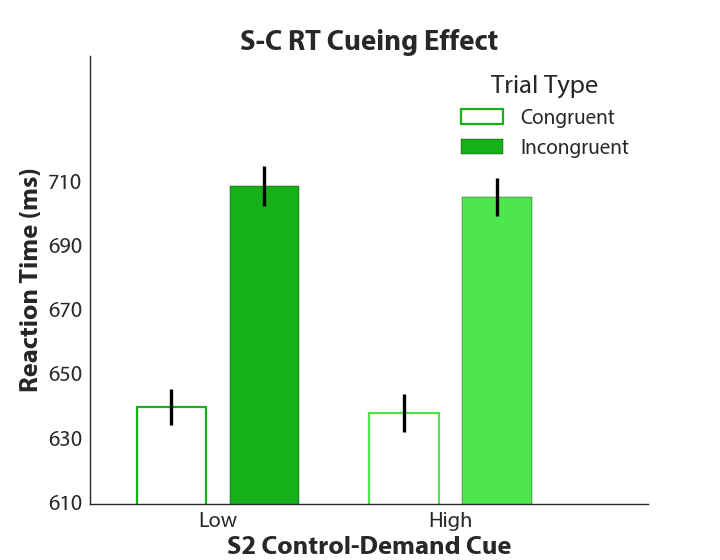

In [86]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,RTanalysis.LowC.mean(),barwidth,yerr=RTstderror.LowC,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,RTanalysis.LowIC.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=RTstderror.LowIC,ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(3,RTanalysis.HighC.mean(),barwidth,yerr=RTstderror.HighC,ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(4,RTanalysis.HighIC.mean(),barwidth,color=(0.3,0.9,0.3),yerr=RTstderror.HighIC,ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(610,750);
ax.set_xlim(0,6);
ax.set_xticklabels(('Low', 'High'));
ax.set_xticks([1 + barwidth/2, 3.5 + barwidth/2]);
ax.set_yticks(np.arange(610, 711, 20));
plt.legend([rects1,rects2], ['Congruent','Incongruent'], loc='upper right',fontsize=18,title='Trial Type')
plt.legend(title='Trial Type',fontsize=19)
plt.title('S-C RT Cueing Effect', fontsize=26,fontweight="bold")
plt.ylabel('Reaction Time (ms)', fontsize=24,fontweight="bold")
plt.xlabel('S2 Control-Demand Cue', fontsize=24,fontweight="bold")
sns.despine();

plt.show()

<IPython.core.display.Javascript object>


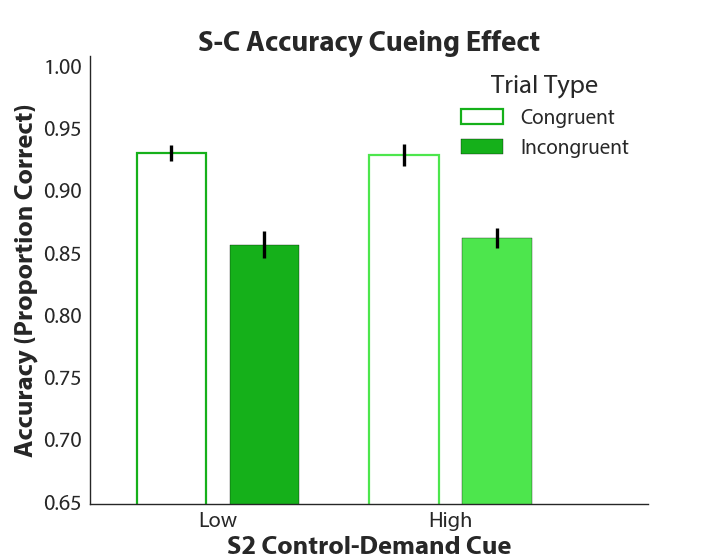

In [87]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,ACCanalysis.LowC.mean(),barwidth,yerr=ACCstderror.LowC,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,ACCanalysis.LowIC.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=ACCstderror.LowIC,ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(3,ACCanalysis.HighC.mean(),barwidth,yerr=ACCstderror.HighC,ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(4,ACCanalysis.HighIC.mean(),barwidth,color=(0.3,0.9,0.3),yerr=ACCstderror.HighIC,ecolor='k',error_kw=dict(lw=3));
ax.set_ylim(0.65,1.01);
ax.set_xlim(0,6);
ax.set_xticklabels(('Low', 'High'));
ax.set_xticks([1 + barwidth/2, 3.5 + barwidth/2]);
ax.set_yticks(np.arange(0.65, 1.01, 0.05));
plt.legend([rects1,rects2], ['Congruent','Incongruent'], loc='upper right',fontsize=18,title='Trial Type')
plt.legend(title='Trial Type',fontsize=19)
plt.title('S-C Accuracy Cueing Effect', fontsize=26,fontweight="bold")
plt.ylabel('Accuracy (Proportion Correct)', fontsize=24,fontweight="bold")
plt.xlabel('S2 Control-Demand Cue', fontsize=24,fontweight="bold")
sns.despine();

plt.show()

# Making CSV Copies of the Data

If you like handling the data yourself, these CSVs organize the data by the relevant variables.

In [88]:
%cd 'csvdata'

C:\Users\cb383\Documents\controltransfer\expt2\data\csvdata


In [89]:
subrunmeans = cdat.groupby(['subject','RunCounter','ContextCong'])['RT'].mean()
subrtmeans = cdat.groupby(['subject', 'ContextCong'])['RT'].mean()
subrunmedians = cdat.groupby(['subject','RunCounter','ContextCong'])['RT'].median()
subrtmedians = cdat.groupby(['subject', 'ContextCong'])['RT'].median()

subrunmeans.to_csv('SC_RTsubrunmeans_subRunTTContext.csv')
subrunmedians.to_csv('SC_RTsubrunmedians_subRunTTContext.csv')
subrtmeans.to_csv('SC_RTmeansallsubs_subTTContext.csv')
subrtmedians.to_csv('SC_RTmediansallsubs_subTTContext.csv')

accmeans = adat.groupby(['subject', 'ContextCong'])['Accuracy'].mean()
subaccmeans = adat.groupby(['subject','RunCounter', 'ContextCong'])['Accuracy'].mean()

accmeans.to_csv('SC_ACCmeans_subTTContext.csv')
subaccmeans.to_csv('SC_ACCsubmeans_subrunTTContext.csv')

## Running ANOVAs in R

In [90]:
#note: subs 20 & 22 have a missing cell for RT on run 1 because those subs got all the trials incorrect
#note: because of these missing cells, I chose to report the SPSS results for this particular analysis

#######################################################################################################

#AN_sub_RTmeans = cdat.loc[cdat['subject'] != 22 && cdat['subject'] != 20].groupby(['subject','RunCounter','DemandCue','TrialType'])['RT'].mean();
AN_sub_RTmeans = cdat.groupby(['subject','RunCounter','DemandCue','TrialType'])['RT'].mean();
AN_sub_ACCmeans = adat.groupby(['subject','RunCounter','DemandCue','TrialType'])['Accuracy'].mean();

#create tidy data csvs
AN_sub_RTmeans.to_csv('SC_ANOVA_RT.csv')
AN_sub_ACCmeans.to_csv('SC_ANOVA_ACC.csv')

#create headers for the tidy data csvs, for analysis purposes
import csv
with open('SC_ANOVA_RT.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SC_ANOVA_RT.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "context", "trialtype", "rt"])
    w.writerows(data)

with open('SC_ANOVA_ACC.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SC_ANOVA_ACC.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "context", "trialtype", "acc"])
    w.writerows(data)

In [91]:
%%writefile SCAnova.R

rawRTData <- read.csv('SC_ANOVA_RT.csv')
install.packages("psych",repos='https://mirrors.nics.utk.edu/cran/')
install.packages("ez",repos='https://mirrors.nics.utk.edu/cran/')
library(psych)
library(ez)

rawRTData$subject = as.factor(rawRTData$subject)
rawRTData$run = as.factor(rawRTData$run)
rawRTData$context = as.factor(rawRTData$context)
rawRTData$trialtype = as.factor(rawRTData$trialtype)

summary(aov(rt ~ run * context * trialtype + Error(subject/(run + context + trialtype)), data = rawRTData))

#ez ANOVA doesn't work with missing cells
#SC_RT_runANOVA <- ezANOVA(data=as.data.frame(rawRTData),
#                                  dv=rt,
#                                  wid=subject,
#                                  within=.(run, context, trialtype),
#                                  detailed=TRUE)
#print(SC_RT_runANOVA)

rawACCData <- read.csv('SC_ANOVA_ACC.csv')

rawACCData$subject = as.factor(rawACCData$subject)
rawACCData$run = as.factor(rawACCData$run)
rawACCData$context = as.factor(rawACCData$context)
rawACCData$trialtype = as.factor(rawACCData$trialtype)

SC_ACC_runANOVA <- ezANOVA(data=as.data.frame(rawACCData),
                                  dv=acc,
                                  wid=subject,
                                  within=.(run, context, trialtype),
                                  detailed=TRUE)
print(SC_ACC_runANOVA)

Overwriting SCAnova.R


In [92]:
! Rscript SCAnova.R

package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpMbWdNg\downloaded_packages
package 'ez' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpMbWdNg\downloaded_packages

Error: subject
          Df  Sum Sq Mean Sq F value Pr(>F)
run        1   14082   14082   0.406  0.526
Residuals 71 2465423   34724               

Error: subject:run
           Df Sum Sq Mean Sq F value Pr(>F)    
run         3   2450     817   0.342 0.7950    
context     1  30887   30887  12.933 0.0004 ***
Residuals 215 513451    2388                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Error: subject:context
          Df Sum Sq Mean Sq F value Pr(>F)
context    1   1591    1591   1.187  0.280
trialtype  1    591     591   0.441  0.509
Residuals 71  95125    1340               

Error: subject:trialtype
            Df  Sum Sq Mea

trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.3/psych_1.7.5.zip'
Content type 'application/zip' length 3966532 bytes (3.8 MB)
downloaded 3.8 MB

trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.3/ez_4.4-0.zip'
Content type 'application/zip' length 304848 bytes (297 KB)
downloaded 297 KB

Warning message:
package 'psych' was built under R version 3.3.3 
Warning message:
package 'ez' was built under R version 3.3.3 


# Making 95% Confidence Intervals

In [93]:
import statsmodels.stats.api as sms

a = RTanalysis.LowC.mean()
sms.DescrStatsW(RTanalysis.LowC).tconfint_mean()
#a

(629.20262437588724, 651.48601231030682)

In [94]:
a = RTanalysis.LowIC.mean()
sms.DescrStatsW(RTanalysis.LowIC).tconfint_mean()
#a

(697.06490333731642, 721.61799049892772)

In [95]:
a = RTanalysis.HighC.mean()
sms.DescrStatsW(RTanalysis.HighC).tconfint_mean()
#a

(626.4324470355964, 650.33447987078171)

In [96]:
a = RTanalysis.HighIC.mean()
sms.DescrStatsW(RTanalysis.HighIC).tconfint_mean()
#a

(694.20454739937884, 717.83861793693961)

In [97]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].LowC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].LowC).tconfint_mean()
#a

(627.78535191509468, 655.28365052500362)

In [98]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].LowIC.mean()
#sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].LowIC).tconfint_mean()
#again, one subject did poorly on run 1, for low incongruent trials, i.e., has a blank for this TT, so I'm recalculating...
b = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].LowIC.std()
stderror = b / n;
CI = stderror * 1.96;
UCI = a + CI;
LCI = a - CI;
LCI
#a

691.0607067863752

In [99]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].HighC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].HighC).tconfint_mean()
#a

(627.35482524930956, 659.60003450281022)

In [100]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].HighIC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].HighIC).tconfint_mean()
#a

(696.62276823582374, 723.76842775642831)

In [101]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].LowC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].LowC).tconfint_mean()
#a

(628.96119431903435, 652.05651714900182)

In [102]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].LowIC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].LowIC).tconfint_mean()
#a

(691.97440630045094, 723.37060348428486)

In [103]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].HighC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].HighC).tconfint_mean()
#a

(625.71603455600598, 657.40865559402687)

In [104]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].HighIC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].HighIC).tconfint_mean()
#a

(689.90959838436254, 716.41362566934492)

In [105]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 2].LowC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 2].LowC).tconfint_mean()
#a

(626.70653880708005, 651.66963727116172)

In [106]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 2].LowIC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 2].LowIC).tconfint_mean()
#a

(692.5146047379568, 722.11435808004705)

In [107]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 2].HighC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 2].HighC).tconfint_mean()
#a

(615.3166278009337, 643.24403756110155)

In [108]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 2].HighIC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 2].HighIC).tconfint_mean()
#a

(697.53294905932796, 721.7865635738591)

In [109]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 3].LowC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 3].LowC).tconfint_mean()
#a

(627.36363039364085, 651.61749357760493)

In [110]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 3].LowIC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 3].LowIC).tconfint_mean()
#a

(698.72595687956857, 730.8709120049715)

In [111]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 3].HighC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 3].HighC).tconfint_mean()
#a

(624.64383458567465, 652.32387578614532)

In [112]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 3].HighIC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 3].HighIC).tconfint_mean()
#a

(690.29548581139647, 716.6408697387551)

And for Accuracy...

In [113]:
a = ACCanalysis.LowC.mean()
sms.DescrStatsW(ACCanalysis.LowC).tconfint_mean()
#a

(0.91892969946912317, 0.94512555347014993)

In [114]:
a = ACCanalysis.LowIC.mean()
sms.DescrStatsW(ACCanalysis.LowIC).tconfint_mean()
#a

(0.83683736046033952, 0.87977222858075643)

In [115]:
a = ACCanalysis.HighC.mean()
sms.DescrStatsW(ACCanalysis.HighC).tconfint_mean()
#a

(0.9125074007977142, 0.94793780468173783)

In [116]:
a = ACCanalysis.HighIC.mean()
sms.DescrStatsW(ACCanalysis.HighIC).tconfint_mean()
#a

(0.84736376475294317, 0.8794810335428177)

In [117]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].LowC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].LowC).tconfint_mean()
#a

(0.88444098241753322, 0.93576449703452158)

In [118]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].LowIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].LowIC).tconfint_mean()
#a

(0.73795306129679661, 0.82369077431964177)

In [119]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].HighC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].HighC).tconfint_mean()
#a

(0.85928724884841223, 0.93865795663103979)

In [120]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].HighIC).tconfint_mean()
#a

(0.79506399368133163, 0.85562093782551762)

In [121]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].LowC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].LowC).tconfint_mean()
#a

(0.93426360034527633, 0.9578596873259565)

In [122]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].LowIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].LowIC).tconfint_mean()
#a

(0.85890812067371669, 0.91848913960025602)

In [123]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].HighC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].HighC).tconfint_mean()
#a

(0.90648999941350261, 0.95309904168238779)

In [124]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].HighIC).tconfint_mean()
#a

(0.85226324957674715, 0.89088743535475967)

In [125]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].LowC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].LowC).tconfint_mean()
#a

(0.9177071994531415, 0.94514078994146755)

In [126]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].LowIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].LowIC).tconfint_mean()
#a

(0.83790850859016452, 0.9052421763413423)

In [127]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].HighC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].HighC).tconfint_mean()
#a

(0.92842615292593123, 0.97568343611516473)

In [128]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].HighIC).tconfint_mean()
#a

(0.85745931714123347, 0.89745672351276595)

In [129]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].LowC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].LowC).tconfint_mean()
#a

(0.92565506111548002, 0.95533808956945154)

In [130]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].LowIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].LowIC).tconfint_mean()
#a

(0.86013248492768268, 0.92411409041478298)

In [131]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].HighC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].HighC).tconfint_mean()
#a

(0.91996250490426457, 0.96017448139710537)

In [132]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].HighIC).tconfint_mean()
#a

(0.86225443643140753, 0.89630720740420888)